In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
# 警告メッセージを非表示にする
warnings.filterwarnings("ignore")


# データの読み込み
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
venue_data = pd.read_csv('../data/venue_information.csv')
holidays_in_japan_data = pd.read_csv('../data/holidays_in_japan.csv')
match_reports_data = pd.read_csv('../data/match_reports.csv')

# データの結合
all_data = pd.concat([train_data, test_data], ignore_index=True)

# # 日付列の変換
all_data['kick_off_time'] = pd.to_datetime(all_data['match_date'] + ' ' + all_data['kick_off_time'])
all_data['match_date'] = pd.to_datetime(all_data['match_date'])


all_data['month'] = all_data['match_date'].dt.month

# # all_dataの表示
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             3825 non-null   int64         
 1   match_date     3825 non-null   datetime64[ns]
 2   kick_off_time  3825 non-null   datetime64[ns]
 3   section        3825 non-null   object        
 4   round          3825 non-null   object        
 5   home_team      3825 non-null   object        
 6   away_team      3825 non-null   object        
 7   venue          3825 non-null   object        
 8   weather        3825 non-null   object        
 9   temperature    3825 non-null   float64       
 10  humidity       3825 non-null   float64       
 11  broadcasters   3825 non-null   object        
 12  attendance     3366 non-null   float64       
 13  month          3825 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
memory usage: 418.

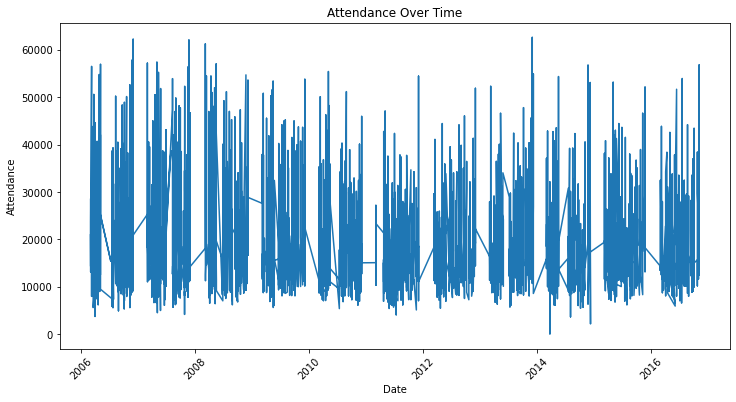

In [8]:
# 時系列の可視化
plt.figure(figsize=(12, 6))
plt.plot(all_data['match_date'], all_data['attendance'])
plt.title('Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

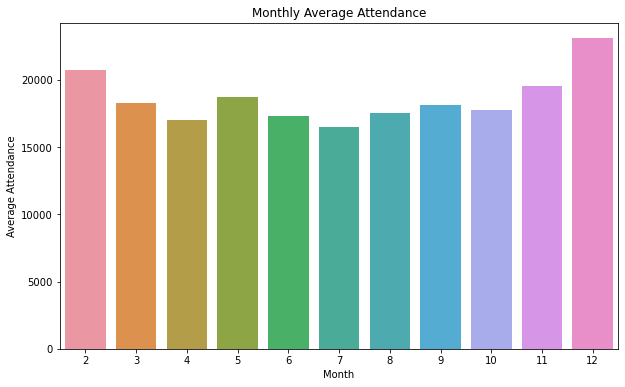

In [10]:
# 季節性の分析
all_data['month'] = all_data['match_date'].dt.month
monthly_avg_attendance = all_data.groupby('month')['attendance'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_attendance.index, y=monthly_avg_attendance.values)
plt.title('Monthly Average Attendance')
plt.xlabel('Month')
plt.ylabel('Average Attendance')
plt.show()

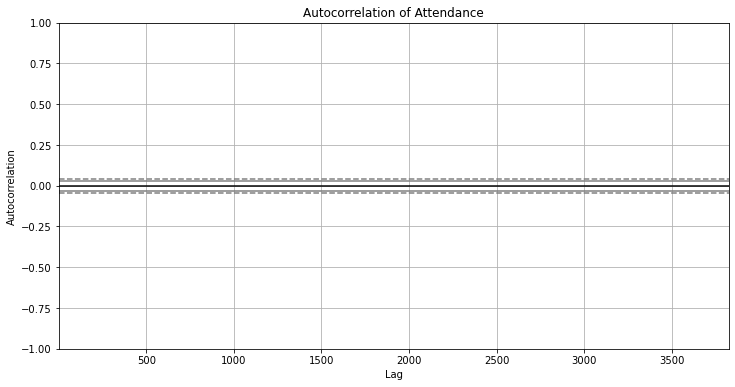

In [11]:
# 自己相関の分析
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(all_data['attendance'])
plt.title('Autocorrelation of Attendance')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

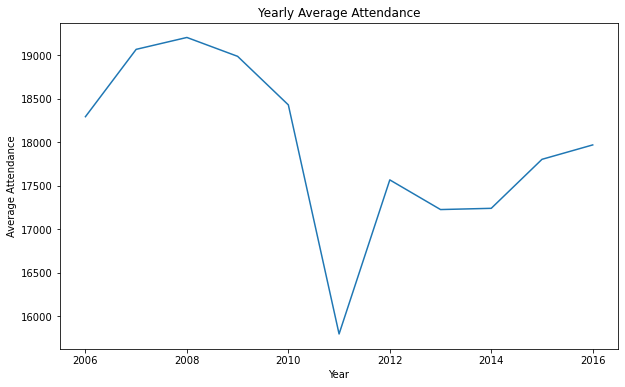

In [12]:
# トレンドの分析
all_data['year'] = all_data['match_date'].dt.year
yearly_avg_attendance = all_data.groupby('year')['attendance'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg_attendance.index, y=yearly_avg_attendance.values)
plt.title('Yearly Average Attendance')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()